In [124]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("./data/titanic_train.csv" , sep=",")
df.shape

(891, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.isnull().sum()[df.isna().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [13]:
df.isnull().sum().sum()

866

In [14]:
df['rate'] = df.isnull().sum()/df.isnull().sum().sum()

In [20]:
#df = df.drop(['rate'],axis=1)
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


,col
0,PassengerId
1,Survived
2,Pclass
3,Name
4,Sex
5,Age
6,SibSp
7,Parch
8,Ticket
9,Fare


In [55]:
col = df.columns
df2 = pd.DataFrame({'col':col})
cnt = []
rate = []
for i in col:
     cnt.append(df[i].isnull().sum())
     rate.append(round(df[i].isnull().sum()/df.isnull().sum().sum()*100,1))
     #df2['rate'] = df[i].isnull.sum()/df[i].isnull.sum().sum()
df2['cnt'] = cnt
df2['rate'] = rate

In [56]:
df2

,col,cnt,rate
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,177,20.4
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


In [66]:
col = df.columns
df2 = pd.DataFrame({'col':col})
cnt = []
rate = []
for i in col:
     cnt.append(df[i].isnull().sum())
     rate.append(round(df[i].isnull().sum()/df.isnull().sum().sum()*100,1))
     
df2['cnt'] = cnt
df2['rate'] = rate
df3 = df2[df2['cnt']>0]
df3

,col,cnt,rate
5,Age,177,20.4
10,Cabin,687,79.3
11,Embarked,2,0.2


In [ ]:
dic = {'col':df.isna().sum().index,
       'cnt':df.isna().sum().values,
       

In [72]:
df3.sort_values(ascending=False, by='rate')

,col,cnt,rate
10,Cabin,687,79.3
5,Age,177,20.4
11,Embarked,2,0.2


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [78]:
def nancheck(where=0):
    if where ==1:
        print(df2[df2['cnt']==0])
    else:
        print(df2)
# 1이면 결측만 보여주기
# 0이면 다보여주기

In [79]:
nancheck(1)

           col  cnt  rate
0  PassengerId    0   0.0
1     Survived    0   0.0
2       Pclass    0   0.0
3         Name    0   0.0
4          Sex    0   0.0
6        SibSp    0   0.0
7        Parch    0   0.0
8       Ticket    0   0.0
9         Fare    0   0.0


In [83]:
nancheck(0)

            col  cnt  rate
0   PassengerId    0   0.0
1      Survived    0   0.0
2        Pclass    0   0.0
3          Name    0   0.0
4           Sex    0   0.0
5           Age  177  20.4
6         SibSp    0   0.0
7         Parch    0   0.0
8        Ticket    0   0.0
9          Fare    0   0.0
10        Cabin  687  79.3
11     Embarked    2   0.2


In [84]:
dic = {"col":df.isna().sum().index, 
       "cnt":df.isna().sum().values, 
       "rate":df.isna().sum().values / df.shape[0] *100}
nandf = pd.DataFrame(dic)
nandf.sort_values("cnt",ascending=False).T


,10,5,11,0,1,2,3,4,6,7,8,9
col,Cabin,Age,Embarked,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
cnt,687,177,2,0,0,0,0,0,0,0,0,0
rate,77.104377,19.86532,0.224467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
def nancheck(where=0):
    if where ==1:
        print(nandf[nandf['cnt']>0])
    else:
        print(nandf)

In [89]:
nancheck(0)

            col  cnt       rate
0   PassengerId    0   0.000000
1      Survived    0   0.000000
2        Pclass    0   0.000000
3          Name    0   0.000000
4           Sex    0   0.000000
5           Age  177  19.865320
6         SibSp    0   0.000000
7         Parch    0   0.000000
8        Ticket    0   0.000000
9          Fare    0   0.000000
10        Cabin  687  77.104377
11     Embarked    2   0.224467


In [90]:
nancheck(1)

         col  cnt       rate
5        Age  177  19.865320
10     Cabin  687  77.104377
11  Embarked    2   0.224467


In [91]:
# def nancheck(where):
#     if where ==1:
#         sel = titanic.isna().sum()>0
#     else :
#         sel = titanic.columns
#     return pd.DataFrame({"col":titanic.isna().sum()[sel].index, 
#                         "cnt":titanic.isna().sum()[sel].values, 
#                         "rate":titanic.isna().sum()[sel].values / titanic.shape[0] *100})


In [93]:
19.865320+77.104377+0.224467

97.194164

In [94]:
df.isnull().sum().sum()

866

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
df.dtypes # series 타입

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [104]:
type(df.dtypes)

pandas.core.series.Series

In [110]:
df['PassengerId'].dtypes=='int64'

True

In [113]:
df['Name'].dtypes=='int64'            

False

In [119]:
tmp = [ i for i in df.columns if df[i].dtypes =='object']
print(tmp)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [122]:
print(df.dtypes.values)
print(df.dtypes.index)

[dtype('int64') dtype('int64') dtype('int64') dtype('O') dtype('O')
 dtype('float64') dtype('int64') dtype('int64') dtype('O')
 dtype('float64') dtype('O') dtype('O')]
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [125]:
df.columns[np.where(df.dtypes=='object')]

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [135]:
df.select_dtypes(include = 'object').columns.tolist() 
# include, exclude 있다고 한다.

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [140]:
df[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']][:5]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


## object타입 --> numeric 타입

### df['컬럼'].astype('category').cat.codes

- 형변환: df['컬럼'] = df['컬럼'].astype('타입')
- 카테고리타입으로 변형 : df['컬럼'] = df['컬럼'].astype('category') 'S'--> S


In [181]:
dfcp = df[['Sex','Embarked']][:20].copy()
dfcp

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
5,male,Q
6,male,S
7,male,S
8,female,S
9,female,C


In [182]:
dfcp.value_counts()

Sex     Embarked
female  S           8
male    S           7
female  C           3
male    Q           2
dtype: int64

In [183]:
dfcp['Sex'].value_counts()

female    11
male       9
Name: Sex, dtype: int64

In [184]:
dfcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       20 non-null     object
 1   Embarked  20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


In [185]:
# category로 바꾸고
# cat.codes로 수치형 범주 라벨링 가능. ㄷㄷㄷ
dfcp['Embarked_c'] = dfcp['Embarked'].astype('category')

In [186]:
dfcp.head()

,Sex,Embarked,Embarked_c
0,male,S,S
1,female,C,C
2,female,S,S
3,female,S,S
4,male,S,S


In [187]:
dfcp['Embarked_cd'] = dfcp['Embarked_c'].cat.codes

In [188]:
dfcp.head(5)

,Sex,Embarked,Embarked_c,Embarked_cd
0,male,S,S,2
1,female,C,C,0
2,female,S,S,2
3,female,S,S,2
4,male,S,S,2


## map

df[컬럼] = df[컬럼].map(dict)

In [189]:
dic = {'C':0, 'Q':1, 'S':2}

dfcp['Embarked_c'] = dfcp['Embarked'].map(dic)
dfcp

,Sex,Embarked,Embarked_c,Embarked_cd
0,male,S,2,2
1,female,C,0,0
2,female,S,2,2
3,female,S,2,2
4,male,S,2,2
5,male,Q,1,1
6,male,S,2,2
7,male,S,2,2
8,female,S,2,2
9,female,C,0,0


### replace
- df.replace([원본값], [변경값], inplace=True) 

In [190]:
dfcp['Embarked_rep']=dfcp['Embarked']
dfcp['Embarked_rep'].replace(['C','Q','S'],[0,1,2], inplace=True)
dfcp

,Sex,Embarked,Embarked_c,Embarked_cd,Embarked_rep
0,male,S,2,2,2
1,female,C,0,0,0
2,female,S,2,2,2
3,female,S,2,2,2
4,male,S,2,2,2
5,male,Q,1,1,1
6,male,S,2,2,2
7,male,S,2,2,2
8,female,S,2,2,2
9,female,C,0,0,0


### df.apply(람다식)

In [ ]:
tmp = lambda x: 1 if x=='male' else 0

In [211]:
tmp =list(map(lambda x: 1 if x=='male' else 0, dfcp['Sex']) )

In [212]:
tmp

[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0]

In [217]:
dfcp['Sex2'] = dfcp['Sex'].apply(lambda x : 1 if x=='male' else 0)

In [218]:
dfcp

,Sex,Embarked,Embarked_c,Embarked_cd,Embarked_rep,Sex2
0,male,S,2,2,2,1
1,female,C,0,0,0,0
2,female,S,2,2,2,0
3,female,S,2,2,2,0
4,male,S,2,2,2,1
5,male,Q,1,1,1,1
6,male,S,2,2,2,1
7,male,S,2,2,2,1
8,female,S,2,2,2,0
9,female,C,0,0,0,0


In [219]:
da = lambda x:0 if x=='C' else (1 if x=='Q' else 2)
dfcp['Embarked_lam'] = dfcp['Embarked'].apply(lambda x: 0 if x=='C' else (1 if x=='Q' else 2))
dfcp.head()

,Sex,Embarked,Embarked_c,Embarked_cd,Embarked_rep,Sex2,Embarked_lam
0,male,S,2,2,2,1,2
1,female,C,0,0,0,0,0
2,female,S,2,2,2,0,2
3,female,S,2,2,2,0,2
4,male,S,2,2,2,1,2


In [221]:
dfcp2 = df[['SibSp', 'Parch']].copy()

In [222]:
dfcp2.head(2)

,SibSp,Parch
0,1,0
1,1,0


In [223]:
dfcp2.dtypes

SibSp    int64
Parch    int64
dtype: object

In [225]:
dfcp2[['SibSp2', 'Parch2']] = dfcp2[['SibSp', 'Parch']].apply(lambda x: x**2)
dfcp2

,SibSp,Parch,SibSp2,Parch2
0,1,0,1,0
1,1,0,1,0
2,0,0,0,0
3,1,0,1,0
4,0,0,0,0
...,...,...,...,...
886,0,0,0,0
887,0,0,0,0
888,1,2,1,4
889,0,0,0,0


In [232]:
# groupby 대신해서 value_count
df[['Pclass','Survived','Sex']].value_counts()

Pclass  Survived  Sex   
3       0         male      300
1       1         female     91
2       0         male       91
1       0         male       77
3       0         female     72
        1         female     72
2       1         female     70
3       1         male       47
1       1         male       45
2       1         male       17
        0         female      6
1       0         female      3
dtype: int64

In [233]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [242]:
df.groupby(['Survived'])['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [246]:
df.groupby(['Pclass'])['SibSp'].mean()

Pclass
1    0.416667
2    0.402174
3    0.615071
Name: SibSp, dtype: float64

In [248]:
temp = df.groupby('Pclass')[['SibSp','Parch']].mean()
temp

,SibSp,Parch
Pclass,,
1,0.416667,0.356481
2,0.402174,0.380435
3,0.615071,0.393075


In [250]:
temp[temp.index==1]

,SibSp,Parch
Pclass,,
1,0.416667,0.356481


In [254]:
temp = df.groupby('Pclass')[['SibSp', 'Parch']].mean()
print(temp.index)
temp.values

Int64Index([1, 2, 3], dtype='int64', name='Pclass')


array([[0.41666667, 0.35648148],
       [0.40217391, 0.38043478],
       [0.61507128, 0.39307536]])

## group index를 일반 컬럼자리로 놓은 방법

In [256]:
temp = df.groupby('Pclass', as_index=False)[['SibSp', 'Parch']].mean()
temp[:5]

,Pclass,SibSp,Parch
0,1,0.416667,0.356481
1,2,0.402174,0.380435
2,3,0.615071,0.393075


<AxesSubplot:>

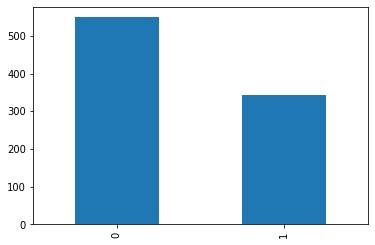

In [236]:
df['Survived'].value_counts().plot(kind='bar')

- reset_index()

In [257]:
temp = temp.reset_index()
temp.head()

,index,Pclass,SibSp,Parch
0,0,1,0.416667,0.356481
1,1,2,0.402174,0.380435
2,2,3,0.615071,0.393075


In [258]:
temp = temp.set_index('Pclass')
temp.head()

,index,SibSp,Parch
Pclass,,,
1,0,0.416667,0.356481
2,1,0.402174,0.380435
3,2,0.615071,0.393075


In [259]:
temp = temp.reset_index()
temp

,Pclass,index,SibSp,Parch
0,1,0,0.416667,0.356481
1,2,1,0.402174,0.380435
2,3,2,0.615071,0.393075


In [260]:
temp = df.groupby('Pclass')['Age'].agg([max, min])

In [261]:
temp

,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


In [262]:
temp = df.groupby(['Pclass', 'Survived'])['Age'].agg([max, min])

In [263]:
temp

max    min
Pclass Survived             
1      0         71.0   2.00
       1         80.0   0.92
2      0         70.0  16.00
       1         62.0   0.67
3      0         74.0   1.00
       1         63.0   0.42

In [267]:
dic = {'Age':[max,min] , 'Parch':sum}
temp = df.groupby(['Pclass','Survived']).agg(dic)
temp


Age        Parch
                  max    min   sum
Pclass Survived                   
1      0         71.0   2.00    24
       1         80.0   0.92    53
2      0         70.0  16.00    14
       1         62.0   0.67    56
3      0         74.0   1.00   143
       1         63.0   0.42    50

In [268]:
df.groupby(['Pclass', 'Survived'])[['Age', 'Parch']].agg({'Age':[min,max], 'Parch':[sum, np.mean, np.std]})


Age       Parch                    
                   min   max   sum      mean       std
Pclass Survived                                       
1      0          2.00  71.0    24  0.300000  0.700813
       1          0.92  80.0    53  0.389706  0.690387
2      0         16.00  70.0    14  0.144330  0.432765
       1          0.67  62.0    56  0.643678  0.820904
3      0          1.00  74.0   143  0.384409  0.914144
       1          0.42  63.0    50  0.420168  0.807757